# Assignment 1

## Exercise 1.1

rough sketch for ex 1.2:

1. define the „positive“ subspace P in the RGB cube
2. iterate over all pixels in I and check if in P or ~P
3. write result to new image
4. play around with size and shape of P and display binary image (**RESULT**)



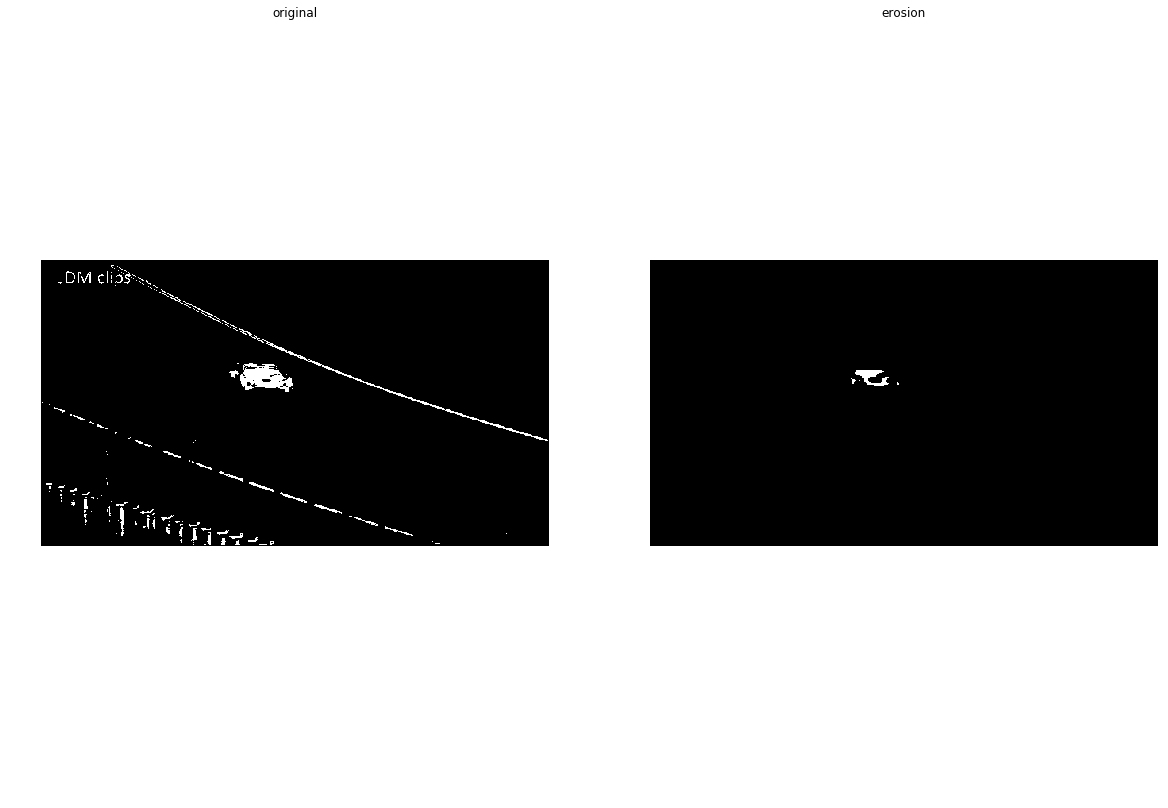

In [132]:
from skimage import io, data, color
from skimage.morphology import erosion, disk, dilation
import numpy as np
import matplotlib.pyplot as plt


image = io.imread('images/racecar/000.jpeg')
width, height, blub = image.shape
mask = np.zeros_like(image[:,:,0])

for y in range(0,height):
    for x in range(0,width):
        if image[x,y,2] > 180 and image[x,y,0:1] < 220 :
            mask[x,y] = 255



selem = disk(3.1)
eroded = erosion(mask, selem)

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 14), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(mask, eroded, 'erosion')


## Exercise 1.2

* starting from the binary color detection image
* erase noise with an erosion operation
* dilate once to get original size of object
* find connected components with one-pass algorithm
* extract bounding box on the fly
* draw bounding box on original image (**RESULT**)

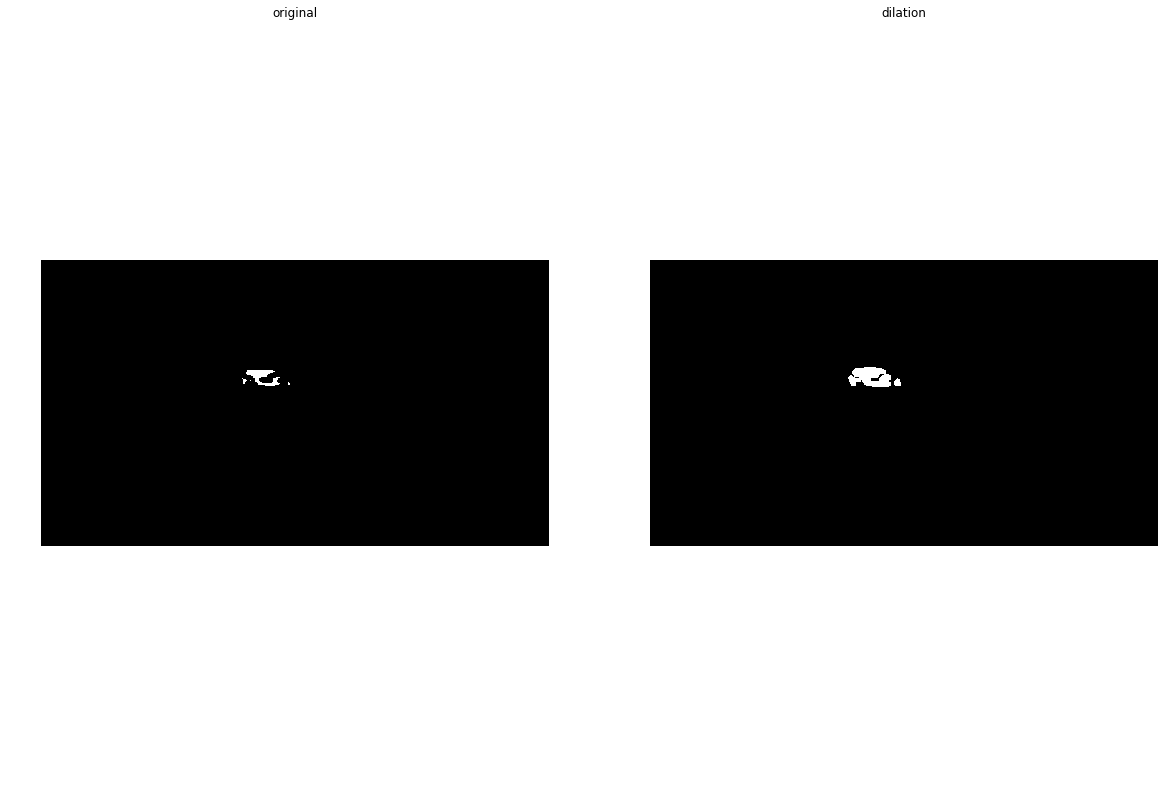

In [133]:
dilated = dilation(eroded, selem)
plot_comparison(eroded, dilated, 'dilation')



In [134]:
from skimage import measure
import numpy as np

components = measure.label(dilated)
print("Number of components:") 
np.max(components)

Number of components:


2

## Exercise 1.3

* use your color detection and connected components algorithm
* implement simplest tracking algorithm
* draw history of all previous points on frame (**RESULT**)